In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:/Users/nkm/Downloads/Task 3 and 4_Loan_Data.csv")
df.head()


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


Min FICO: 408
Max FICO: 850
Mean FICO: 637.56


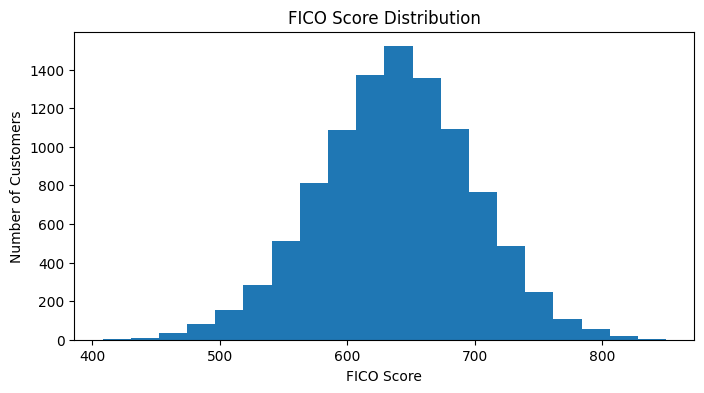

In [3]:
# We’ll look at:
#Minimum score
#Maximum score
#Overall distribution
#This helps decide how many risk buckets make sense.

# Basic stats for FICO scores
print("Min FICO:", df["fico_score"].min())
print("Max FICO:", df["fico_score"].max())
print("Mean FICO:", round(df["fico_score"].mean(), 2))

# Plot distribution
plt.figure(figsize=(8,4))
plt.hist(df["fico_score"], bins=20)
plt.title("FICO Score Distribution")
plt.xlabel("FICO Score")
plt.ylabel("Number of Customers")
plt.show()



In [4]:
# Create 5 equal-width FICO buckets
df["fico_bucket"] = pd.cut(df["fico_score"], bins=5, labels=["A", "B", "C", "D", "E"])

# Check result
df[["fico_score", "fico_bucket"]].head(10)


,fico_score,fico_bucket
0,605,C
1,572,B
2,602,C
3,612,C
4,631,C
5,697,D
6,722,D
7,545,B
8,676,D
9,447,A


In [5]:
# Default rate per bucket
bucket_summary = df.groupby("fico_bucket")["default"].agg(["count", "mean"])
bucket_summary.columns = ["total_customers", "default_rate"]

bucket_summary


C:\Users\nkm\AppData\Local\Temp\ipykernel_80416\3728714873.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_summary = df.groupby("fico_bucket")["default"].agg(["count", "mean"])


,total_customers,default_rate
fico_bucket,,
A,129,0.720930
B,1762,0.392736
C,5336,0.166792
D,2588,0.066461
E,185,0.021622


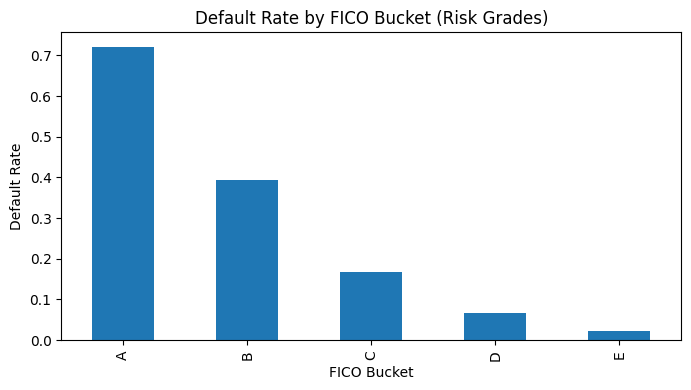

In [6]:
# Plot default rate by bucket
bucket_summary["default_rate"].plot(kind="bar", figsize=(8,4))

plt.title("Default Rate by FICO Bucket (Risk Grades)")
plt.xlabel("FICO Bucket")
plt.ylabel("Default Rate")
plt.show()


In [7]:
# We sort by fico_score from worst → best so we can form buckets based on behavior.

df_sorted = df.sort_values("fico_score")
df_sorted.head()


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,fico_bucket
2092,7264776,1,4457.914800,12233.49501,98913.32028,3,408,0,A
6556,6901345,3,5281.352243,16411.51801,79905.09892,1,409,1,A
7001,2585781,4,6734.984475,26384.58439,97668.03091,2,418,1,A
5521,1252008,5,5176.915602,22990.26543,82417.59227,2,425,1,A
2629,1337395,5,4271.314690,22756.28103,83475.30929,4,438,1,A


In [8]:
# This splits customers into 5 groups with equal number of customers, not equal score width.

df_sorted["fico_bucket_risk"] = pd.qcut(
    df_sorted["fico_score"],
    q=5,
    labels=["E", "D", "C", "B", "A"]
)

df_sorted[["fico_score", "fico_bucket_risk"]].head(10)


,fico_score,fico_bucket_risk
2092,408,E
6556,409,E
7001,418,E
5521,425,E
2629,438,E
1558,440,E
3776,441,E
1868,444,E
9,447,E
1964,449,E


In [9]:
# Let’s check if this model is better than equal-width.

risk_bucket_summary = df_sorted.groupby("fico_bucket_risk")["default"].agg(["count", "mean"])
risk_bucket_summary.columns = ["total_customers", "default_rate"]

risk_bucket_summary


C:\Users\nkm\AppData\Local\Temp\ipykernel_80416\317806090.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_bucket_summary = df_sorted.groupby("fico_bucket_risk")["default"].agg(["count", "mean"])


,total_customers,default_rate
fico_bucket_risk,,
E,2050,0.398537
D,1971,0.215627
C,1989,0.151332
B,1997,0.100150
A,1993,0.054190


In [ ]:
README FILE

## Credit Rating System (FICO Bucketing Model)

### Objective
Design a bank-style credit rating system by segmenting customers into risk grades based on FICO scores and validating each grade using observed default behavior.

### Methodology
1. Analyzed FICO score distribution and customer risk profile
2. Built an initial equal-width bucket model (A–E)
3. Improved segmentation using quantile-based bucketing to ensure balanced population per grade
4. Validated risk separation by calculating default rates for each bucket

### Output
- Risk grades: A (Very Low Risk) → E (Very High Risk)
- Each grade shows a monotonic increase in default rate
- Model can be used for loan policy, risk-based pricing, and portfolio monitoring

### Business Use Case
This rating system helps financial institutions:
- Set loan approval thresholds by risk grade
- Apply risk-based interest pricing
- Monitor portfolio health by customer segment
- Support regulatory and risk reporting


In [ ]:
# “I built a complete credit risk framework that includes a Probability of Default model using logistic regression,
# an Expected Loss model using PD, LGD, and EAD, and a FICO-based credit rating system using quantile bucketing validated through default rate analysis. 
# This allows for both individual loan decisions and portfolio-level risk monitoring.”